In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

The Reynolds number is 3128911 corresponding to a velocity of 50m/s and unit chord length

The flap is set at 20 degrees at (0.8, 0) and the slat at 15 degrees at (0.1, 0)

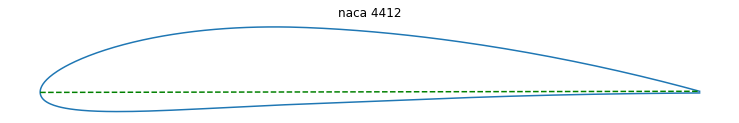

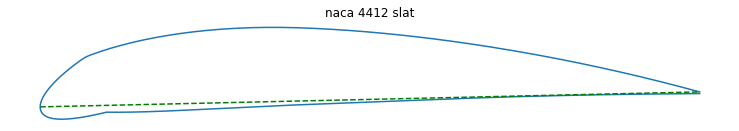

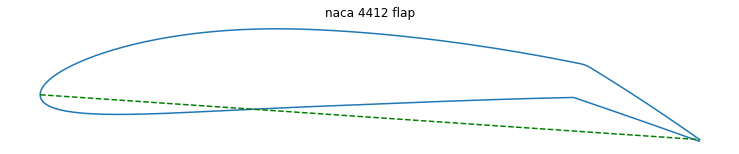

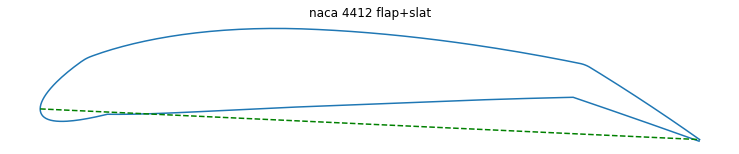

In [2]:
af_inputs = glob.glob('*4412*input.dat')

for filename in af_inputs[::-1]:
    adf = pd.DataFrame(np.loadtxt(filename, skiprows = 1), columns = ['x', 'y'])
    plt.figure(figsize = (13, 3))
    plt.plot(adf['x'], adf['y'])
    plt.plot([adf['x'].min(), adf['x'].max()], 
             [adf[adf['x']==adf['x'].min()]['y'].values[0], adf[adf['x']==adf['x'].max()]['y'].values[0]],
            color = 'green', linestyle = '--')
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.title(filename.split('_')[0])
    plt.show()

In [3]:
def clean_nulls(list_):
    return [elem for elem in list_ if len(elem) != 0]

In [4]:
x_dats = glob.glob('*.dat')
x_dats = [item for item in x_dats if ('4412' in item and 'old' not in item and 'input' not in item)]
to_save_names = [file.split('.')[:-1][0] for file in x_dats]
x_op_dicts = dict()

to_save_names

['naca_4412_base', 'naca_4412_f', 'naca_4412_fs', 'naca_4412_s']

In [5]:
vars_ = clean_nulls(np.genfromtxt(x_dats[0], delimiter='|', dtype=None, encoding=None)[5].split(' '))
for ind, filename in enumerate(x_dats):
    data = np.loadtxt(filename, skiprows = 12)
    x_op_dicts[to_save_names[ind]] = pd.DataFrame(data = data, columns = vars_)

In [6]:
# for item in x_op_dicts.keys():
#     x_op_dicts[item]['L/D'] = x_op_dicts[item]['CL']/x_op_dicts[item]['CD']

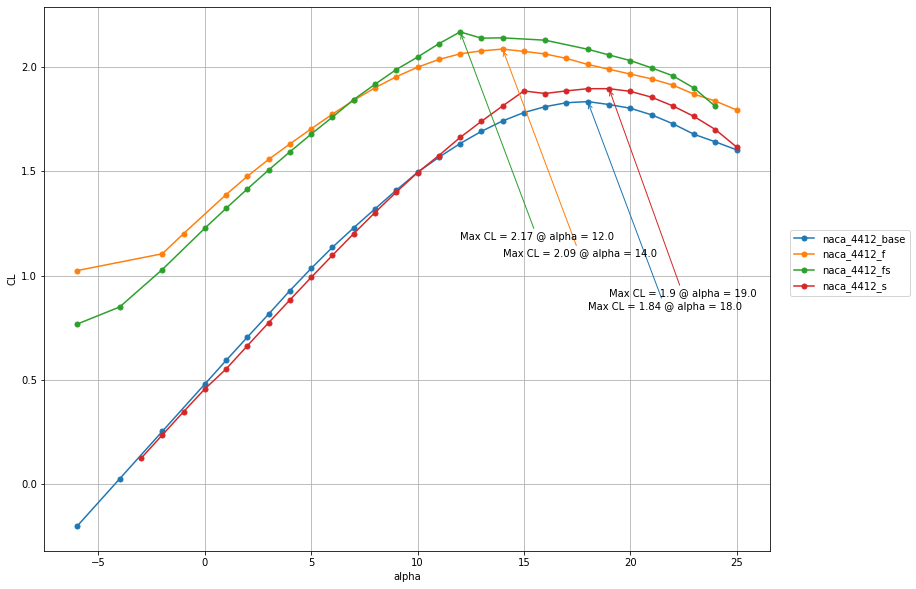

In [7]:
def plot_var_(plot_var, x_axis = 'alpha', maxx = True):
    cmap = plt.cm.get_cmap('tab10')
    plt.figure(figsize = (13, 10))
    for i, item in enumerate(x_op_dicts.keys()):
        df = x_op_dicts[item]
        plt.plot(df[x_axis], df[plot_var], marker = '.', markersize = 10, label = item, color = cmap(i))
        if maxx == True:   
            max_y = df[plot_var].max()
            max_x = df[df[plot_var]==df[plot_var].max()][x_axis].values[0]
            plt.annotate(f'Max {plot_var} = {round(max_y, 2)} @ {x_axis} = {round(max_x, 2)}',
                 xy=(max_x, max_y),
                 xytext=(max_x, max_y-1),  # Position of the text
                 arrowprops=dict(arrowstyle = '->', linewidth = 1, color = cmap(i)))

    plt.legend(bbox_to_anchor = (1.2, 0.6))
    plt.xlabel(x_axis)
    plt.ylabel(plot_var)
    plt.grid(True)
    
    plt.show()

plot_var_('CL', maxx = True)

As can be observed, the flaps "offsetted" the polar lift curve w.r.t the original, while the slats increased the maximum lift coefficient.

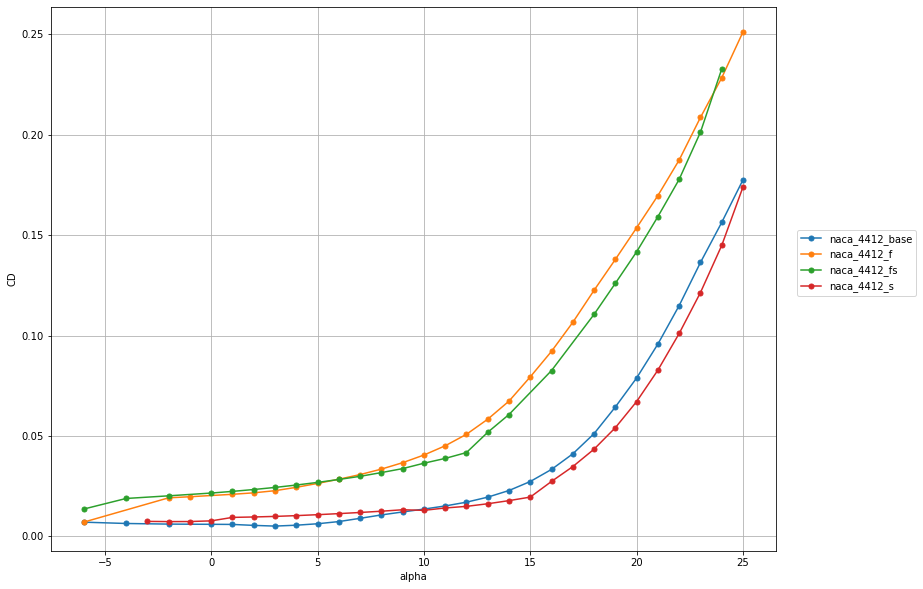

In [8]:
plot_var_('CD', maxx = False)

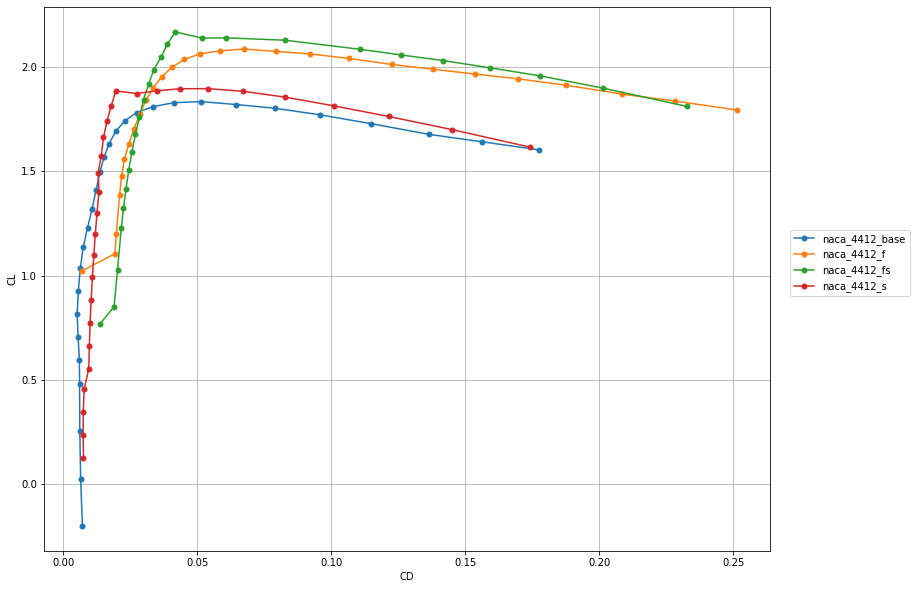

In [9]:
plot_var_('CL', 'CD', maxx = False)

With addition of flaps, the polar plot is shifted to high drag AND high lift region, while addition of slats slightly decreased the drag as well, despite increasing the maximum lift

This is because flaps increase maximum lift by increasing the effective airfoil camber. Hence, it also decreases the maximum angle of attack for maximum lift due to early flow separation. And to prevent this flow separation, slats are used often in conjunction with flaps, which allows for an accelerated flow at leadng edge of airfoil curvature, leading to a higher local Re and hence, more attached flow due to more momentum ("energy") in the turbulent BL

> *The next time you fly in an airliner, watch the wings during takeoff and landing. On **takeoff**, we want **high lift** and **low drag**, so the flaps will be set downward at a moderate setting.*

Remember that flaps increase the drag, and we can't be too aggresive in using them, hence the moderate setting.

> *During **landing** we want **high lift** and **high drag**, so the flaps and slats will be fully deployed. When the **wheels touch down**, we want to **decrease the lift**, so you will often see **spoilers** deployed on the top of the wing to kill the lift. Spoilers create additional drag to slow down the plane.*